In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

In [15]:
print( "O formato do DataFrame é: ", df.shape)

O formato do DataFrame é:  (27820, 12)


In [9]:
df.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# Análise do documento: 
* O arquivo possui 12 colunas com 27820 linhas 
* As colunas são:
    * Country : País 
    * Year    : Ano de Nascimento
    * Sex     : Sexo
    * Age     : Faixa etária :  * 5 -14 
                                * 15 -24 
                                * 25-34 anos
                                * 35-54 anos
                                * 55-74 anos
                                * 75+ anos
    *Suicides no : Número de suidicidios
    *Population : População
    *suicides/100k pop: número de suicídios por 100 mil habitantes
    *country_year: identificador contendo country + year
    *HDI for year: Índice de Desenvolvimento Humano (IDH) para o ano
    *gdp_for_year: Produto Interno Bruto (PIB) para o ano
    *gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [14]:
df_brasil = df[df.country== "Brazil"].copy()    #Extraindo do Dataframe apenas os casos referentes ao Brasil

In [13]:
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [16]:
print("O novo formato do df é: ", df_brasil.shape)

O novo formato do df é:  (372, 12)


In [18]:
#VERIFICANDO VALORES AUSENTES: 

print("--> DataFrame Mundial:")
display(df.isnull().sum())
print("*********************************************************")
print("--> Dataframe Brasil: ")
display(df_brasil.isnull().sum())

--> DataFrame Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

*********************************************************
--> Dataframe Brasil: 


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

* Como observamos anteriormente o Dataframe que contém os dados do Brasil possui 372 linhas, em uma dessas variaveis a HDI for year possui 252 linhas com valores nulos.
* Impossibilitando o uso desta variavel na análise. 

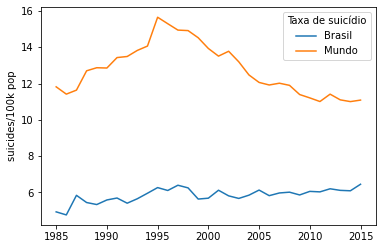

In [19]:
# pegar a media mundial e do Brasil em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vou eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

* Podemos observar que apesar da taxa de suicidio ser bem menor que a do restante do mundo, é possível também notar que a taxa vem crescendo bastante. 

In [21]:
# criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# reordenar as tableas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# ver as 5 primeiras entradas da pivot table
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


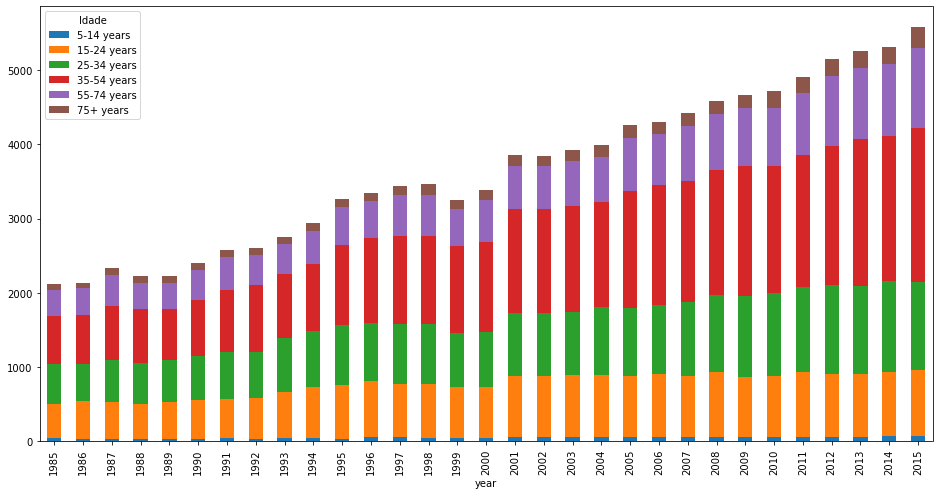

In [22]:
# plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

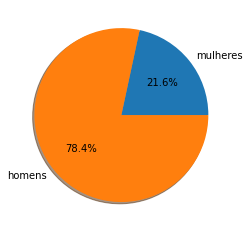

In [24]:
# extrair valores entre homens e mulheres
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

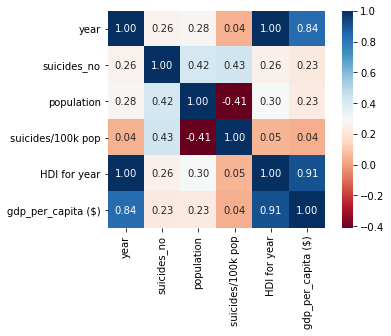

In [25]:
# plotar heatmap
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);